# ISLR-Python: Ch7-Applied 6

- [Generate Data](#Generate-Data)
- [Perform a Single Backfit](#Perform-a-Single-Backfit)
- [Backfit Algorithm](#Backfit-Algorithm)
- [Compare to Multiple Linear Regression Fit](#Compare-to-Multiple-Linear-Regression-Fit)

In [2]:
import numpy as np

from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Generate Data

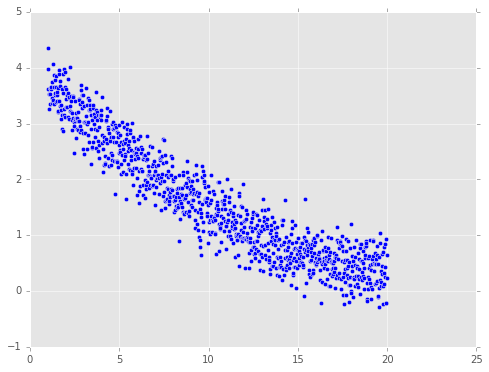

In [3]:
# We will make a 2 predictor model Y= 4 + 0.3*X1 + 0.07*X2 where X2 = X1**2
# predictors
X1 = np.linspace(1,20,1000).reshape(-1,1)
X2 = (X1-2)**2

# model data
beta = [4, -0.3, .007]
X = np.concatenate((X1,X2), axis=1)
Y = (beta[0] + np.dot(X, beta[1:]) + .3*np.random.randn(1,len(X))).reshape(-1,1)

# Take a look at the data
fig,ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(X1,Y)

## Perform a Single Backfit

In [244]:
# initialize starting beta estimate
init_beta = [1,1,1]

# hold beta1 fixed and fit the model Y-beta1*X1 = Beta0 + Beta2*X2 + eps. Extract Beta2_hat
beta2_hat = LinearRegression().fit(X2,Y-init_beta[1]*X1).coef_[0]

# Do the same to get the beta1 estimate using the new beta2_hat estimate
beta1_hat = LinearRegression().fit(X1, Y-beta2_hat*X2).coef_[0]

print('beta1 est=', beta1_hat,'\n','beta2 est=', beta2_hat, sep='')

beta1 est=[ 0.89983882]
beta2 est=[-0.06364871]


## Backfit Algortihm

[-0.30009809] [ 0.00693581]
[-0.30052802] [ 0.0069611]
[-0.30052816] [ 0.00696111]
[-0.30052816] [ 0.00696111]
[-0.30052816] [ 0.00696111]
[-0.30052816] [ 0.00696111]
[-0.30052816] [ 0.00696111]
[-0.30052816] [ 0.00696111]
[-0.30052816] [ 0.00696111]


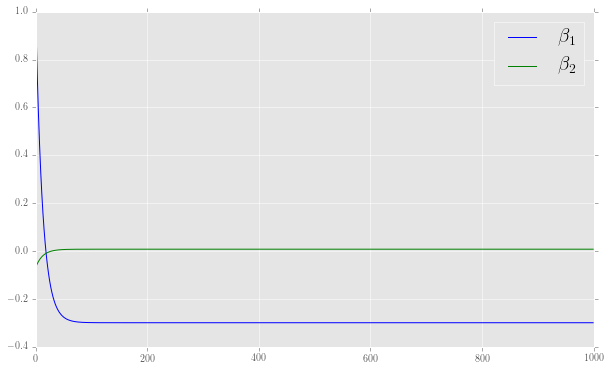

In [267]:
beta1=np.empty([1000,1])
beta2=np.empty([1000,1])

# initial beta values
beta1[0]= 1
beta2[0] = LinearRegression().fit(X2,Y-beta1[0]*X1).coef_[0]

iterations = np.arange(1,1000)
for iteration in np.arange(1,1000):
    
    # use the last beta1 to estimate the new beta2
    beta2[iteration] = LinearRegression().fit(X2,Y-beta1[iteration-1]*X1).coef_[0]
    # use the updated beta2 to estimate a new beta1
    beta1[iteration] = LinearRegression().fit(X1,Y-beta2[iteration]*X2).coef_[0]
    
    # print every 50th iteration
    if iteration%100==0:
        print(beta1[iteration],beta2[iteration])

fig, ax = plt.subplots(1,1, figsize=(10,6));
ax.plot(iterations, beta1[1:], color='b', label=r'$\beta_1$');
ax.plot(iterations, beta2[1:], color='g', label=r'$\beta_2$');
ax.legend(loc='best', prop={'size':20});

So within the first 50 iterations, we are seeing convergence. 

## Compare to Multiple Linear Regression Fit

In [269]:
estimate = LinearRegression().fit(X, Y)
print(estimate.coef_)

[[-0.30052816  0.00696111]]


So the backfitting approach very quicly approaches (< 50 iterations) the solutions determined using the Full Least Squares model.